In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image as keras_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
%matplotlib inline
import zipfile
from IPython.display import display, HTML
import io
from PIL import Image
import cv2
import os

In [ ]:
dataset_path = "drive/MyDrive/datasets/rockpaperscissors.zip"

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")

data_dir = "dataset/rockpaperscissors/rps-cv-images"
class_dir = os.listdir(data_dir)

class_dir = [img for img in class_dir if os.path.isdir(os.path.join(data_dir, img))]



In [ ]:
image_cv = []

data_dir = "dataset/rockpaperscissors/rps-cv-images"

lower_green = np.array([0, 0, 0])
upper_green = np.array([100, 255, 130])

for i in class_dir[:3]:
  image_dir = os.path.join(data_dir, i)
  images = os.listdir(image_dir)
  for image_name in images:
    image_path = os.path.join(image_dir, image_name)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = cv2.inRange(img, lower_green, upper_green)
    img[mask > 0] = [255, 255, 255]
    output_path = os.path.join(data_dir, i, image_name)
    cv2.imwrite(output_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))


In [ ]:

batch_size = 32
image_size = (100, 150)
validation_split = 0.4

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=validation_split
)




train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(3, activation = 'softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=30,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 - 21s - 704ms/step - accuracy: 0.3699 - loss: 1.1154 - val_accuracy: 0.3500 - val_loss: 1.0946
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 - 1s - 29ms/step - accuracy: 0.3307 - loss: 1.0991 - val_accuracy: 0.3500 - val_loss: 1.0965
Epoch 3/20
30/30 - 6s - 199ms/step - accuracy: 0.3602 - loss: 1.0977 - val_accuracy: 0.4375 - val_loss: 1.0921
Epoch 4/20
30/30 - 1s - 36ms/step - accuracy: 0.4479 - loss: 1.0717 - val_accuracy: 0.3375 - val_loss: 1.1412
Epoch 5/20
30/30 - 7s - 243ms/step - accuracy: 0.4387 - loss: 1.0445 - val_accuracy: 0.4938 - val_loss: 0.9604
Epoch 6/20
30/30 - 2s - 52ms/step - accuracy: 0.5599 - loss: 0.9443 - val_accuracy: 0.6622 - val_loss: 0.8556
Epoch 7/20
30/30 - 7s - 219ms/step - accuracy: 0.6903 - loss: 0.7300 - val_accuracy: 0.7000 - val_loss: 0.7058
Epoch 8/20
30/30 - 2s - 67ms/step - accuracy: 0.7578 - loss: 0.5864 - val_accuracy: 0.8188 - val_loss: 0.4933
Epoch 9/20
30/30 - 8s - 268ms/step - accuracy: 0.8198 - loss: 0.4532 - val_accuracy: 0.8500 - val_loss: 0.3716
Epoch 10/20
30/30 - 1s - 35ms/step - accuracy: 0.8136 - loss: 0.4750 - val_accuracy: 0.6750 - val_loss: 0.9437
Epoch 11/20
30/3

Saving blak.webp to blak (1).webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
File 'blak (1).webp' memiliki classes: paper - [1]


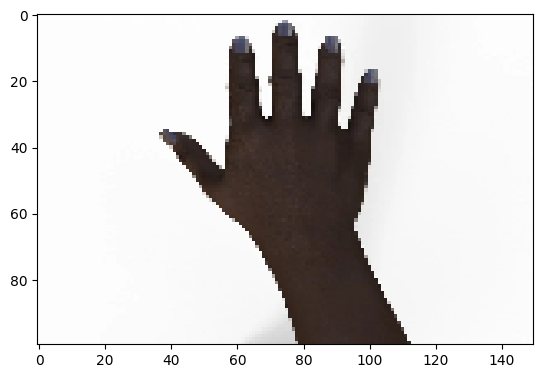

In [ ]:

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = keras_image.load_img(path, target_size=image_size)
  imgplot = plt.imshow(img)
  x = keras_image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=30)
  predicted_class_index = np.argmax(classes, axis=1)
  class_labels = {0: 'scissor', 1: 'paper', 2: 'rock'}
  predicted_label = class_labels[predicted_class_index[0]]


  print(f"File '{fn}' memiliki classes: {predicted_label} - {predicted_class_index}")